In [19]:
# Import dependencies
import numpy as np
import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt

# Data Preparation

In [2]:
# Generate population DataFrame from csv file
raw_pop_data = pd.read_csv("../country_data/pop.csv", encoding='unicode_escape')

# Remove unnecessary columns
raw_pop_data = raw_pop_data[["Country (or dependency)", "Population"]]

# Remove invalid entries (NaN)
pop_data = raw_pop_data.dropna()

# Rename columns
pop_data.columns = ["Country", "Population"]

In [3]:
# Generate age DataFrame from csv file
raw_age_data = pd.read_csv("../country_data/age.csv")

# Take the columns we want
raw_age_data = raw_age_data[["country", "MedianAge2023"]]

# Remove invalid entries (NaN)
age_data = raw_age_data.dropna()

# Rename columns
age_data.columns = ["Country", "Median Age"]

In [4]:
# Generate GDP DataFrame from csv file
raw_gdp_data = pd.read_csv("../country_data/gdp.csv")
raw_gdp_data

# Take the columns we want
raw_gdp_data = raw_gdp_data[["country", "GdpPerCapitaIMF_USD_23"]]

# Remove invalid entries (NaN)
gdp_data = raw_gdp_data.dropna()

# Rename columns
gdp_data.columns = ["Country", "GDP Per Capita (USD)"]

In [5]:
# Generate Facebook DataFrame from csv file
raw_fb_data = pd.read_csv("platform_data/facebook.csv")

# Take columns we want
fb_data = raw_fb_data[["country", "FacebookUsersTotal2023"]]

# Rename columns
fb_data.columns = ["Country", "Facebook Users"]

In [6]:
# Generate TikTok DataFrame from csv file
tt_data = pd.read_csv("platform_data/tiktok.csv")

# Rename columns
tt_data.columns = ["Country", "TikTok Users"]


In [7]:
# Generate YouTube DataFrame from csv file
raw_yt_data = pd.read_csv("platform_data/youtube.csv")

# Take columns we want
yt_data = raw_yt_data[["country", "YouTubeUsersJuly2023"]]

# Rename columns
yt_data.columns = ["Country", "YouTube Users"]

# Since users is measured in units of millions, we need to convert
yt_data["YouTube Users"] = yt_data['YouTube Users']*1000000

C:\Users\Moburu\AppData\Local\Temp\ipykernel_4276\576258242.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yt_data["YouTube Users"] = yt_data['YouTube Users']*1000000


In [8]:
# We need to merge our DataFrames
population_statistics = pop_data.merge(gdp_data, how="inner", on="Country").merge(age_data, how="inner", on="Country")

# Convert columns to numbers
population_statistics["Population"] = population_statistics["Population"].replace({'\$':'',',':''}, regex = True)
population_statistics["Population"] = population_statistics["Population"].astype(int)

# Drop rows with invalid entries
population_statistics.dropna()

population_statistics.head()

,Country,Population,GDP Per Capita (USD),Median Age
0,India,1428627663,2612.45,29.5
1,China,1425671352,12541.40,39.8
2,United States,339996563,80412.41,38.5
3,Indonesia,277534122,5108.94,31.2
4,Pakistan,240485658,1471.10,22.7


In [9]:
# Add Facebook user data to our DataFrame
fb_data_complete = population_statistics.merge(fb_data, how="inner", on="Country")

# Add a column for percentage of total population on Facebook
fb_data_complete["% of Population"] = fb_data_complete["Facebook Users"]/fb_data_complete["Population"]

fb_data_complete.head()

,Country,Population,GDP Per Capita (USD),Median Age,Facebook Users,% of Population
0,India,1428627663,2612.45,29.5,314600000,0.220211
1,United States,339996563,80412.41,38.5,175000000,0.514711
2,Indonesia,277534122,5108.94,31.2,119900000,0.432019
3,Pakistan,240485658,1471.10,22.7,37300000,0.155103
4,Nigeria,223804632,1755.33,19.2,21750000,0.097183


In [10]:
# Add TikTok user data to our DataFrame
tt_data_complete = population_statistics.merge(tt_data, how="inner", on="Country")

# Add a column for percentage of total population on Facebook
tt_data_complete["% of Population"] = tt_data_complete["TikTok Users"]/tt_data_complete["Population"]

tt_data_complete.head()

,Country,Population,GDP Per Capita (USD),Median Age,TikTok Users,% of Population
0,United States,339996563,80412.41,38.5,113300000,0.333239
1,Indonesia,277534122,5108.94,31.2,109900000,0.395987
2,Pakistan,240485658,1471.10,22.7,16510000,0.068653
3,Brazil,216422446,10413.00,34.7,82210000,0.379859
4,Russia,144444359,13005.71,41.5,54860000,0.379800


In [11]:
# Add YouTube user data to our DataFrame
yt_data_complete = population_statistics.merge(yt_data, how="inner", on="Country")

# Add a column for percentage of total population on Facebook
yt_data_complete["% of Population"] = yt_data_complete["YouTube Users"]/yt_data_complete["Population"]

yt_data_complete.head()

,Country,Population,GDP Per Capita (USD),Median Age,YouTube Users,% of Population
0,India,1428627663,2612.45,29.5,467000000.0,0.326887
1,United States,339996563,80412.41,38.5,246000000.0,0.723537
2,Indonesia,277534122,5108.94,31.2,139000000.0,0.500839
3,Pakistan,240485658,1471.10,22.7,71700000.0,0.298147
4,Nigeria,223804632,1755.33,19.2,31600000.0,0.141195


# Data Visualization

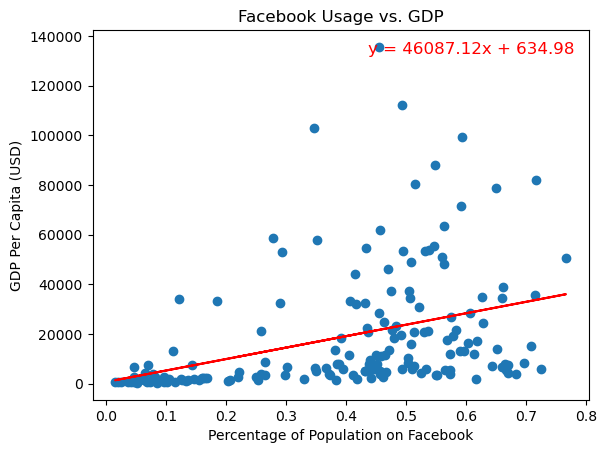

In [56]:
# Calculate line of best fit (code taken from week 5 exercise)
(slope, intercept, rvalue, pvalue, stderr) = linregress(fb_data_complete["% of Population"], fb_data_complete["GDP Per Capita (USD)"])
regress_values = fb_data_complete["% of Population"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot data
plt.scatter(fb_data_complete["% of Population"], fb_data_complete["GDP Per Capita (USD)"])

# Add line of best fit
plt.plot(fb_data_complete["% of Population"],regress_values,"r-")
plt.annotate(line_eq,(0.6,0.88),fontsize=12,color="red", xycoords="subfigure fraction")

# Label chart
plt.title("Facebook Usage vs. GDP")
plt.xlabel("Percentage of Population on Facebook")
plt.ylabel("GDP Per Capita (USD)")
plt.show()

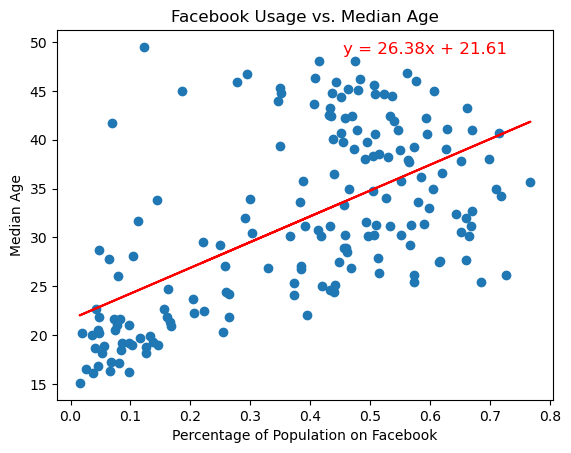

In [57]:
# Calculate line of best fit (code taken from week 5 exercise)
(slope, intercept, rvalue, pvalue, stderr) = linregress(fb_data_complete["% of Population"], fb_data_complete["Median Age"])
regress_values = fb_data_complete["% of Population"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot data
plt.scatter(fb_data_complete["% of Population"], fb_data_complete["Median Age"])

# Add line of best fit
plt.plot(fb_data_complete["% of Population"],regress_values,"r-")
plt.annotate(line_eq,(0.6,0.88),fontsize=12,color="red", xycoords="subfigure fraction")

# Label chart
plt.title("Facebook Usage vs. Median Age")
plt.xlabel("Percentage of Population on Facebook")
plt.ylabel("Median Age")
plt.show()

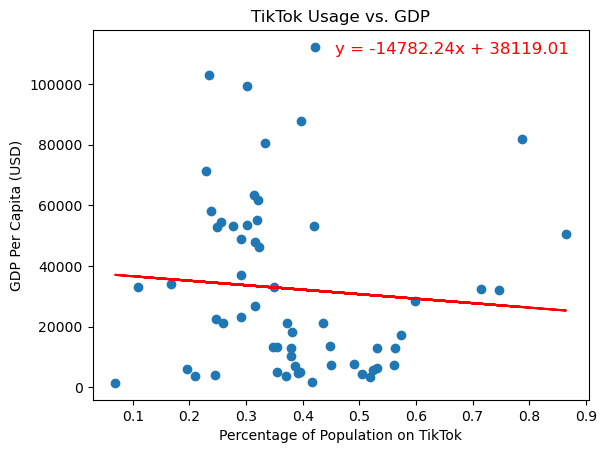

In [60]:
# Calculate line of best fit (code taken from week 5 exercise)
(slope, intercept, rvalue, pvalue, stderr) = linregress(tt_data_complete["% of Population"], tt_data_complete["GDP Per Capita (USD)"])
regress_values = tt_data_complete["% of Population"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot data
plt.scatter(tt_data_complete["% of Population"], tt_data_complete["GDP Per Capita (USD)"])

# Add line of best fit
plt.plot(tt_data_complete["% of Population"],regress_values,"r-")
plt.annotate(line_eq,(0.55,0.88),fontsize=12,color="red", xycoords="subfigure fraction")

# Label chart
plt.title("TikTok Usage vs. GDP")
plt.xlabel("Percentage of Population on TikTok")
plt.ylabel("GDP Per Capita (USD)")
plt.show()

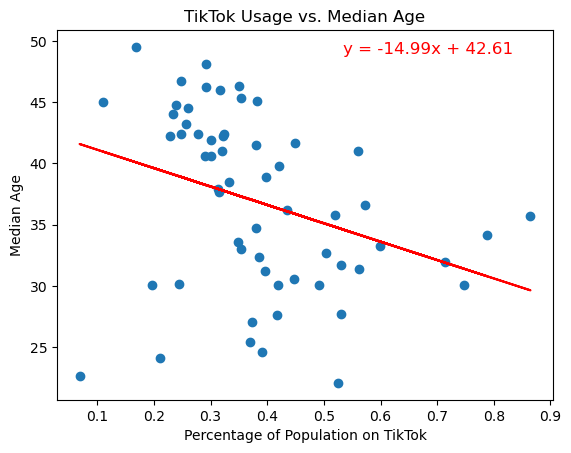

In [61]:
# Calculate line of best fit (code taken from week 5 exercise)
(slope, intercept, rvalue, pvalue, stderr) = linregress(tt_data_complete["% of Population"], tt_data_complete["Median Age"])
regress_values = tt_data_complete["% of Population"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot data
plt.scatter(tt_data_complete["% of Population"], tt_data_complete["Median Age"])

# Add line of best fit
plt.plot(tt_data_complete["% of Population"],regress_values,"r-")
plt.annotate(line_eq,(0.6,0.88),fontsize=12,color="red", xycoords="subfigure fraction")

# Label chart
plt.title("TikTok Usage vs. Median Age")
plt.xlabel("Percentage of Population on TikTok")
plt.ylabel("Median Age")
plt.show()

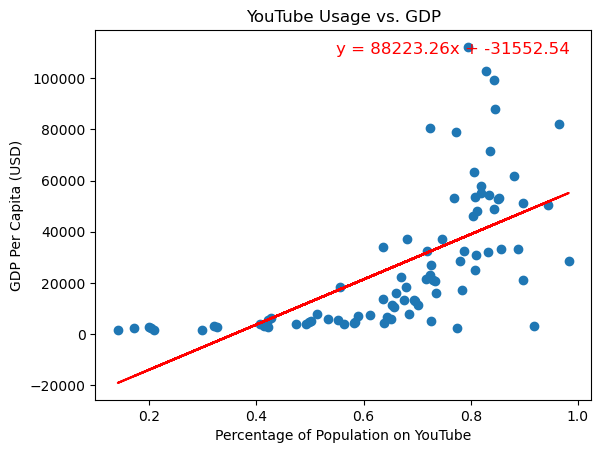

In [63]:
# Calculate line of best fit (code taken from week 5 exercise)
(slope, intercept, rvalue, pvalue, stderr) = linregress(yt_data_complete["% of Population"], yt_data_complete["GDP Per Capita (USD)"])
regress_values = yt_data_complete["% of Population"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot data
plt.scatter(yt_data_complete["% of Population"], yt_data_complete["GDP Per Capita (USD)"])

# Add line of best fit
plt.plot(yt_data_complete["% of Population"],regress_values,"r-")
plt.annotate(line_eq,(0.55,0.88),fontsize=12,color="red", xycoords="subfigure fraction")

# Label chart
plt.title("YouTube Usage vs. GDP")
plt.xlabel("Percentage of Population on YouTube")
plt.ylabel("GDP Per Capita (USD)")
plt.show()

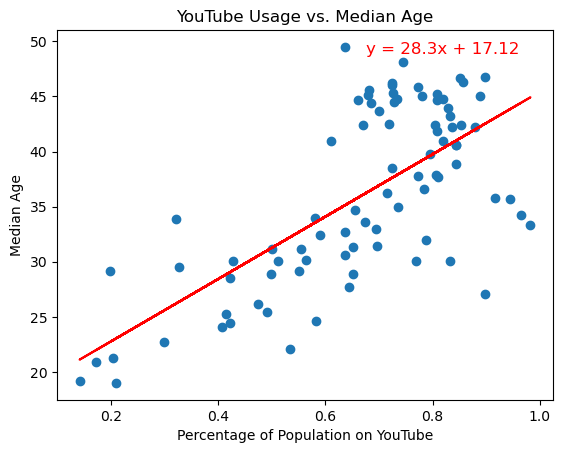

In [66]:
# Calculate line of best fit (code taken from week 5 exercise)
(slope, intercept, rvalue, pvalue, stderr) = linregress(yt_data_complete["% of Population"], yt_data_complete["Median Age"])
regress_values = yt_data_complete["% of Population"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot data
plt.scatter(yt_data_complete["% of Population"], yt_data_complete["Median Age"])

# Add line of best fit
plt.plot(yt_data_complete["% of Population"],regress_values,"r-")
plt.annotate(line_eq,(0.65,0.88),fontsize=12,color="red", xycoords="subfigure fraction")

# Label chart
plt.title("YouTube Usage vs. Median Age")
plt.xlabel("Percentage of Population on YouTube")
plt.ylabel("Median Age")
plt.show()